In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyabf

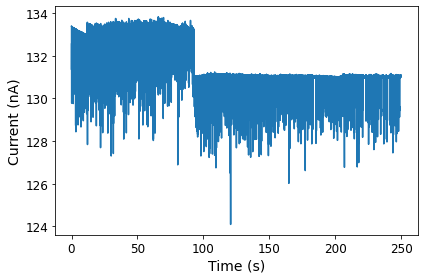

In [5]:
pore = 'pet2363'
particle = 'ecoli'


raw_base = 'D://bacteria_data/raw/'+pore + '/' + particle +'/'
an_base = 'D://bacteria_data/analysis/'+pore + '/' + particle +'/'

abf = pyabf.ABF(raw_base+'/raw/raw.abf')
abf.setSweep(0)
i = abf.sweepY
v = abf.sweepC
t = abf.sweepX

plt.plot(t[t<250],i[t<250])
plt.ylabel('Current (nA)',size=14)
plt.xlabel('Time (s)',size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.tight_layout()

In [2]:
df = pd.read_pickle('D://bacteria_data/dataframes/full_df.pkl')
#df = df[(df.pore=='pet2363')&(df.particle=='ecoli2')]

In [6]:
for i in range(len(df)):
    
    event = df.iloc[i]
    plt.plot((event.t-event.t[0])*1000,event.i_clean)
    plt.xlabel('Time (ms)',size=14)
    plt.ylabel('Current (nA)',size=14)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.savefig('D://bacteria_data/analysis/3M_figures/ecoli2_events/' +str(i)+ '_2363.png')
    plt.close()

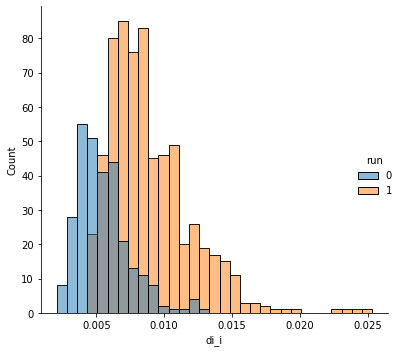

In [7]:
sns.displot(df[df.particle=='ecoli'],x='di_i',hue='run',kind='hist',alpha = 0.5)
plt.tight_layout()
#plt.savefig('D://bacteria_data/analysis/plots/hist/409/ecoli_di.png')

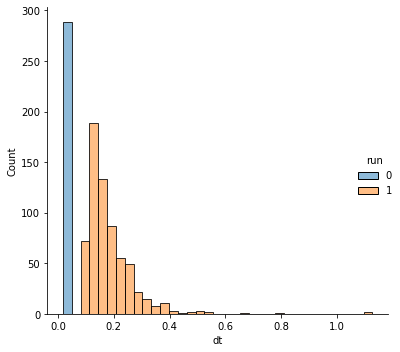

In [8]:
sns.displot(df[df.particle=='ecoli'],x='dt',hue='run',kind='hist',alpha = 0.5)
plt.tight_layout()

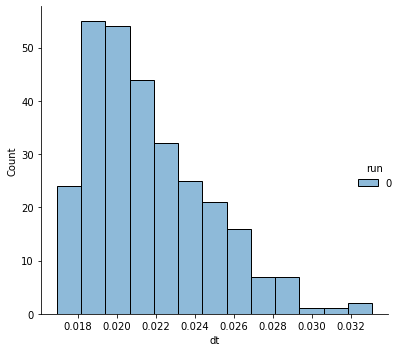

In [11]:
sns.displot(df[(df.particle=='ecoli')&(df.run=='0')],x='dt',hue='run',kind='hist',alpha = 0.5)
plt.tight_layout()

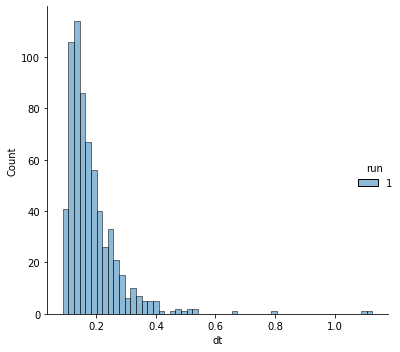

In [12]:
sns.displot(df[(df.particle=='ecoli')&(df.run=='1')],x='dt',hue='run',kind='hist',alpha = 0.5)
plt.tight_layout()

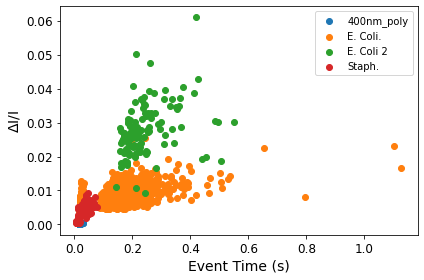

In [3]:
temp_df = df[(df.pore=='pet2363')&(df.particle=='control')]

plt.scatter(temp_df.dt,temp_df.di_i)

temp_df = df[(df.pore=='pet2363')&(df.particle=='ecoli')]

plt.scatter(temp_df.dt,temp_df.di_i)

temp_df = df[(df.pore=='pet2363')&(df.particle=='ecoli2')]

plt.scatter(temp_df.dt,temp_df.di_i)

temp_df = df[(df.pore=='pet2363')&(df.particle=='staph')]

plt.scatter(temp_df.dt,temp_df.di_i)

plt.legend(['400nm_poly','E. Coli.','E. Coli 2','Staph.'])
plt.xlabel('Event Time (s)',size=14)
plt.ylabel('$\Delta$I/I',size=14)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.title('Pore radius = 2363 nm')
plt.tight_layout()
#plt.savefig('D://bacteria_data/analysis/plots/scatter/scatter_2363.png')

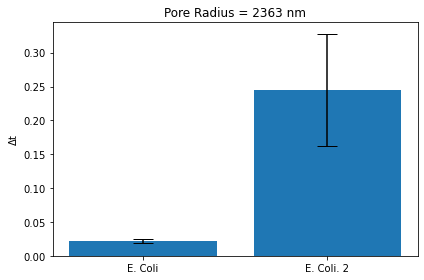

In [9]:
temp_df = df[(df.pore=='pet2363')&(df.particle=='ecoli')]
poly_mean = temp_df.dt.mean()
poly_std = temp_df.dt.std()

temp_df = df[(df.pore=='pet2363')&(df.particle=='ecoli2')]
ecoli_mean = temp_df.dt.mean()
ecoli_std = temp_df.dt.std()

x = np.arange(2)

plt.bar(x,[poly_mean,ecoli_mean],yerr=[poly_std,ecoli_std],capsize=10)
plt.xticks(x,('E. Coli','E. Coli. 2'))
plt.ylabel('$\Delta$t')
plt.title('Pore Radius = 2363 nm')
plt.tight_layout()
#plt.savefig('D://bacteria_data/analysis/plots/bar/bar_2363_dt.png')

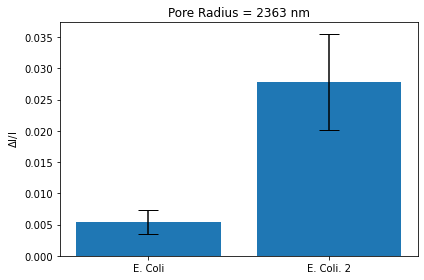

In [13]:
temp_df = df[(df.pore=='pet2363')&(df.particle=='ecoli')]
poly_mean = temp_df.di_i.mean()
poly_std = temp_df.di_i.std()

temp_df = df[(df.pore=='pet2363')&(df.particle=='ecoli2')]
ecoli_mean = temp_df.di_i.mean()
ecoli_std = temp_df.di_i.std()

x = np.arange(2)

plt.bar(x,[poly_mean,ecoli_mean],yerr=[poly_std,ecoli_std],capsize=10)
plt.xticks(x,('E. Coli','E. Coli. 2'))
plt.ylabel('$\Delta$I/I')
plt.title('Pore Radius = 2363 nm')
plt.tight_layout()
#plt.savefig('D://bacteria_data/analysis/plots/bar/bar_2363_di.png')